## Ad Clicks Challenge

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve,auc, precision_score, f1_score, roc_auc_score,precision_recall_curve
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv(r"../DS Challenge/data.csv")
desc = pd.read_csv(r"../DS Challenge/Website Descriptions.csv")
predictions = pd.read_csv(r"../DS Challenge/prediction.csv")

In [3]:
np.unique(df['Diigo'])

array(['0', '1', '2', '3', 'Error: value not found'], dtype=object)

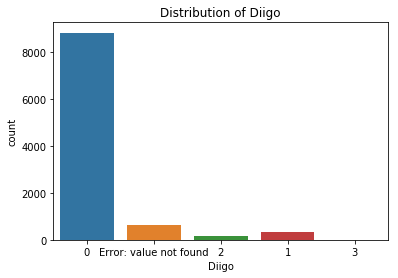

In [4]:
#Distribution of EmploymentStatus in the final list
ax = sns.countplot(df['Diigo'])
ax.set_title('Distribution of Diigo')
ax.grid(False)

In [5]:
df['Diigo'].loc[df['Diigo'] == 'Error: value not found'].count()

642

In [6]:
# Creating dataset to predict missing values in Diigo Dataset 
train_set = df.drop(df[df['Diigo'] == 'Error: value not found'].index, inplace=False)
test_set = df.loc[df['Diigo'] == 'Error: value not found']

In [7]:
#Label Encoder was used to transform categorical variables into numerical values so that they can be input into the logistic regression model.
le = LabelEncoder()
x = train_set.apply(le.fit_transform)

In [8]:
# Remove the only sample with 3 impressions, 
x = x[x.Diigo != 3]

In [9]:
# Creation of y (the target variable with missing values) and x the features to be input into the model 
y = x['Diigo']
x = x.drop(columns=['Diigo','Unnamed: 0'])

In [10]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [11]:
smote = SMOTE(sampling_strategy='minority', random_state=12)
#X_sm, y_sm = smote.fit_sample(x_train, y_train)

In [12]:
# Normal Cross Validation 10 folds 
kf = KFold(n_splits=10)

In [13]:
# Classifier trained to identify missing variables 
metrics = pd.DataFrame() 
ROC = pd.DataFrame() 
for iteration, data in enumerate(kf.split(x,y)):
    x_train, x_test = x.iloc[data[0]], x.iloc[data[1]]
    y_train, y_test = y[data[0]], y[data[1]]
    X_sm, y_sm = smote.fit_sample(x_train, y_train)
    clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 200, max_depth = 16, random_state=12, class_weight='balanced'))
    rf = clf.fit(X_sm, y_sm)
    y_predt = rf.predict(x_train)
    y_pred = rf.predict(x_test)
    prob = rf.predict_proba(x_test)

    train_acc = accuracy_score(y_train,y_predt)
    val_acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average = 'weighted'),
    precision = precision_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test,y_pred, average = 'weighted')   

    # Compute ROC curve and ROC area for each class
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
        roc = {
            "class": i,
            "folds": iteration,
            "fpr": fpr[i],
            "tpr": tpr[i],
            "auc": roc_auc[i],
        }
        
        Metrics = {
            "class": i,
            "folds": iteration,
            "train_acc":train_acc,
            "val_acc": val_acc,
            "recall":recall,
            "precision": precision,
            "f1": f1,
        }

        ROC_c = pd.DataFrame(data=roc, columns=["folds","class", "fpr", "tpr","auc"])
        ROC = ROC.append(ROC_c)
    metric_c = pd.DataFrame(data=Metrics, columns=["folds","train_acc","val_acc", "recall", "precision", "f1"])
    metrics = metrics.append(metric_c)
    print(iteration)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


8
9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
#Metrics looking at true positive rate, false positive rate and AUC 
metrics_stats = metrics.describe()
metrics
#metrics.to_csv("Metrics_200_64.csv", index = False)
#metrics_stats.to_csv("Metrics_stats_200_64.csv", index=False)

,folds,train_acc,val_acc,recall,precision,f1
0,0,0.919962,0.850427,0.852564,0.885703,0.868817
0,1,0.926612,0.884615,0.889957,0.917545,0.903541
0,2,0.910937,0.853632,0.863248,0.903871,0.883093
0,3,0.918893,0.853632,0.860043,0.895740,0.876899
0,4,0.916993,0.864316,0.866453,0.903475,0.883601
0,5,0.924475,0.863248,0.868590,0.881095,0.874356
0,6,0.930175,0.865385,0.868590,0.884656,0.876549
0,7,0.918665,0.852406,0.863102,0.879352,0.870927
0,8,0.922940,0.862032,0.865241,0.916378,0.890075
0,9,0.926502,0.848128,0.850267,0.863214,0.856231


In [15]:
#Metrics looking at precision, recall, f1, test and validation accuracies  
Summary = ROC.groupby(["class"]).mean()
Summary_stats = ROC.groupby(["class"]).describe()
#Summary.to_csv("Summary_200_64.csv", index=False)
#Summary_stats.to_csv("Summary_stats_200_64.csv", index=False)
Summary

,folds,fpr,tpr,auc
class,,,,
0,4.719524,0.492265,0.504199,0.511989
1,4.631965,0.484487,0.496448,0.511850
2,4.847545,0.483037,0.489180,0.506029


In [16]:
#Apply Label Encoding to the Data 
x = test_set.apply(le.fit_transform)

In [17]:
# Creation of y (the target variable with missing values) and x the features to be input into the model 
x = test_set.drop(columns=['Diigo','Unnamed: 0'])
y_pred = clf.predict(x)
prob = clf.predict_proba(x)

In [18]:
#List of new predictions for missing values in Diigo 
Diigo = [int(k) for i,j in enumerate(prob) for k,l in enumerate(prob[i]) if l == prob[i].max()]

In [19]:
#Creating new dataframe with missing values data
new_test_set = test_set.drop(columns = ['Diigo'])
new_test_set['Diigo'] = Diigo

In [20]:
#Append newly created missing values to original dataset without the original missing Diigo Values
final_df = train_set.append(new_test_set, sort=True)
final_df["Diigo"] = pd.to_numeric(final_df["Diigo"])

In [21]:
# Number of Impressions in Entire Dataset
Sum = final_df.drop(columns=['Click','Unnamed: 0']).sum()
Sum_ = pd.DataFrame({'Name':Sum.index, 'Impressions':Sum.values})
Sum_.sort_values(by= ['Impressions'])

,Name,Impressions
4,Buddymedia,0
7,Customerlobby,2
70,Ubertwitter,17
11,Docs,33
67,Twine,168
30,Lithium,189
60,Startaid,204
55,Sharethis,216
73,Vocus,402
28,Kickapps,442


In [23]:
#Create merged dataframe of Coefficients and corresponding categories of websites 
Sum_ = pd.merge(Sum_,desc[['Name','Category']],on='Name', how='left')

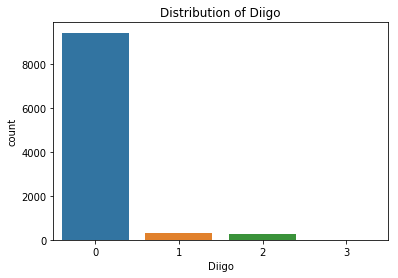

In [24]:
#Distribution of EmploymentStatus in the final list
ax = sns.countplot(final_df['Diigo'])
ax.set_title('Distribution of Diigo')
ax.grid(False)

In [25]:
# Creation of y (the target variable with missing values) and x the features to be input into the model 
y = final_df['Click']
x = final_df.drop(columns=['Click'])

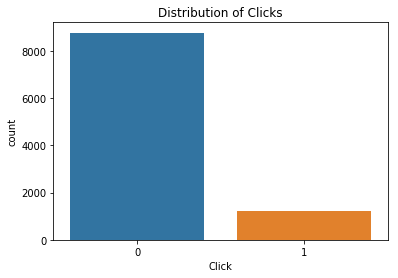

In [26]:
#Distribution of EmploymentStatus in the final list
ax = sns.countplot(final_df['Click'])
ax.set_title('Distribution of Clicks')
ax.grid(False)

In [27]:
# Preparing x dataset by dropping id column and applying min max scaler so that all features are normalised between 0 and 1. 
scaler = preprocessing.MinMaxScaler()

def prep_data(data):
    # Creation of y (the target variable with missing values) and x the features to be input into the model 
    x = data.drop(columns=['Unnamed: 0'])
    scaled_df = scaler.fit_transform(x)
    x = pd.DataFrame(scaled_df, columns=x.columns.values)
    return x

In [28]:
x = prep_data(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
# Model to train Logistic Regression - Used L1 Lasso Regularization to find a sparse solution given the high number of variables 
coefficientsf =pd.DataFrame()
metricsf = pd.DataFrame() 
ROCf = pd.DataFrame() 
for iteration, data in enumerate(kf.split(x,y)):
    x_train, x_test = x.iloc[data[0]], x.iloc[data[1]]
    y_train, y_test = y[data[0]], y[data[1]]
    clf = LogisticRegression(penalty ='l1',C = 0.1, class_weight='balanced', solver = 'saga', max_iter = 2000)
    lr = clf.fit(x_train, y_train)
    y_predt = lr.predict(x_train)
    y_pred = lr.predict(x_test)
    prob = lr.predict_proba(x_test)

    train_acc = accuracy_score(y_train,y_predt)
    val_acc = accuracy_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, prob[:,1])  
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    roc_auc = roc_auc_score(y_test, prob[:,1])
    
    # Cofficients of the Logistic Regression Model showing the relationship between the variables on the target variable. 
    coef = pd.Series(lr.coef_[0], index = x_train.columns).sort_values()
    

    coefficient = {
        "Name": coef.index,
        "folds": iteration,
        "Coefficients": coef.values,
    }
    
    # Compute ROC curve and ROC area for each class
    roc = {
        "folds": iteration,
        "fpr": fpr,
        "tpr": tpr,
        "auc": roc_auc,
    }

    Metrics = {
        "folds": iteration,
        "train_acc":train_acc,
        "val_acc": val_acc,
        "recall":recall,
        "precision": precision,
    }

    ROC_c = pd.DataFrame(data=roc, columns=["folds","fpr", "tpr","auc"])
    ROCf = ROCf.append(ROC_c)
    metric_c = pd.DataFrame(data=Metrics, columns=["folds","train_acc","val_acc", "recall", "precision"])
    metricsf = metricsf.append(metric_c)
    # Create dataframe for coefficients data 
    coefficients = pd.DataFrame(data=coefficient, columns=["Name","folds","Coefficients"])
    coefficientsf = coefficientsf.append(coefficients)

In [30]:
# Metrics statistitcs to see standard deviation, variability in model performance
metrics_stats = metricsf.describe()
metricsf.to_csv("MetricsLR_0.1_L1_saga_2000.csv", index = False)
metrics_stats.to_csv("MetricsLR_0.1_L1_saga_2000.csv", index=False)

In [31]:
metrics_stats

,folds,train_acc,val_acc,recall,precision
count,9951.000000,9951.000000,9951.000000,9951.000000,9951.000000
mean,4.495428,0.549200,0.523531,0.490279,0.121783
std,2.874206,0.010314,0.019526,0.286056,0.036110
min,0.000000,0.532667,0.493000,0.000000,0.000000
25%,2.000000,0.539111,0.510000,0.245763,0.112360
50%,4.000000,0.548667,0.520000,0.481752,0.118421
75%,7.000000,0.554444,0.538000,0.732759,0.132837
max,9.000000,0.568444,0.563000,1.000000,1.000000


In [32]:
Summary = ROCf.mean()
Summary_stats = ROCf.describe()
Summary.to_csv("SummaryLr_0.1_L1_saga_2000.csv", index=False)
Summary_stats.to_csv("SummaryLR_0.1_L1_saga_2000.csv", index=False)

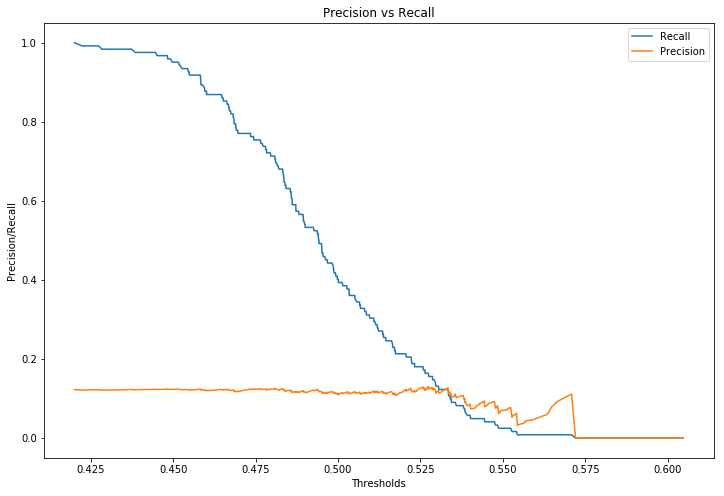

In [33]:
# Only use precision_recall_curve function to draw graph of Precision vs Recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prob[:,1])

plt.figure(figsize = (12,8));
plt.plot(thresholds, recall[:-1],label='Recall');
plt.plot(thresholds, precision[:-1],label='Precision');
plt.xlabel('Thresholds')
plt.ylabel('Precision/Recall')
plt.title('Precision vs Recall')
plt.legend()
plt.show()

In [34]:
# Confusion Matrix function taken from Kaggle Website 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

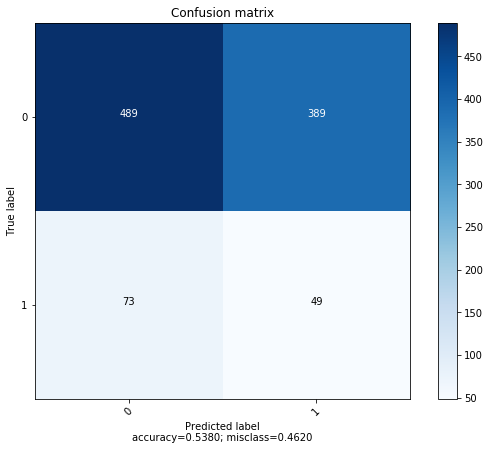

In [35]:
# Plot Confusion Matrix for Classifier 
cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,
                          target_names = ['0','1'],
                          title='Confusion matrix',
                          normalize = False)

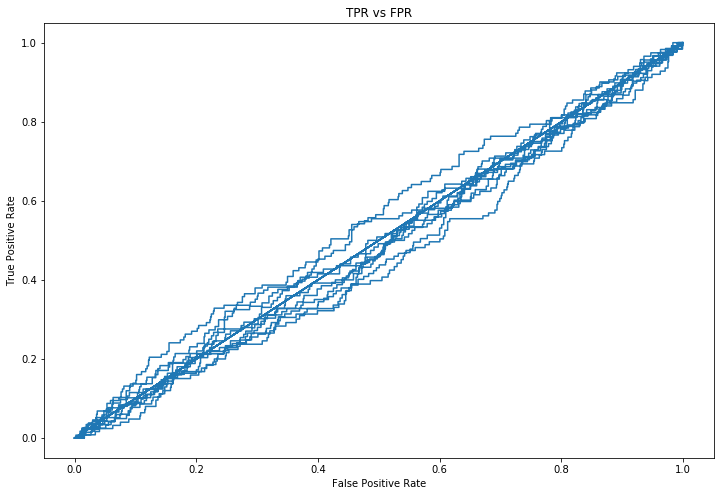

In [36]:
#Plot tpr vs fpr 
plt.figure(figsize = (12,8));
plt.plot(ROCf["fpr"], ROCf["tpr"]);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TPR vs FPR')
plt.show()

In [37]:
# Take Mean Coefficients over 10 fold Cross Validation
mean = coefficientsf.groupby("Name").mean()
mean = mean.Coefficients.to_frame()
mean['Mean']=mean['Coefficients']
mean = mean.drop(columns=['Coefficients'])

In [38]:
# Take Standard Deviation of Coefficients over 10 fold Cross Validation
std = coefficientsf.groupby(['Name']).std()
std = std.Coefficients.to_frame()
std['Standard Deviation']=std['Coefficients']
std = std.drop(columns=['Coefficients'])

In [39]:
#Create Table of Mean and Coefficients - Standard Error was calculated using Excel
table = std.join(mean)
table.to_csv("table.csv", index = True)

In [40]:
#Standard Error Values and Confidence Intervals calculated using excel 
error = pd.read_csv("table_stats.csv")
error

,Name,Standard Deviation,Mean,95% Confidence,Standard Error,conf+,conf-
0,Addthis,0.085976,0.162423,1.96,0.027188,0.215712,0.109134
1,Bebo,0.003063,-0.000969,1.96,0.000969,0.052320,-0.054257
2,Blogcatalog,0.025896,-0.013796,1.96,0.008189,0.039493,-0.067085
3,Blogger,0.054774,-0.028418,1.96,0.017321,0.024871,-0.081707
4,Buddymedia,0.000000,0.000000,1.96,0.000000,0.053289,-0.053289
5,Cnet,0.033667,-0.052748,1.96,0.010646,0.000541,-0.106036
6,Conduit,0.030523,0.019303,1.96,0.009652,0.072592,-0.033986
7,Customerlobby,0.000000,0.000000,1.96,0.000000,0.053289,-0.053289
8,Delicious,0.030688,-0.037886,1.96,0.009704,0.015403,-0.091174
9,Digg,0.013899,-0.004395,1.96,0.004395,0.048894,-0.057684


In [41]:
df1 = coefficientsf.groupby(["Name"]).mean().sort_values(by=['Coefficients'])
df1.to_csv("Coefficients.csv")
j = pd.read_csv("Coefficients.csv")

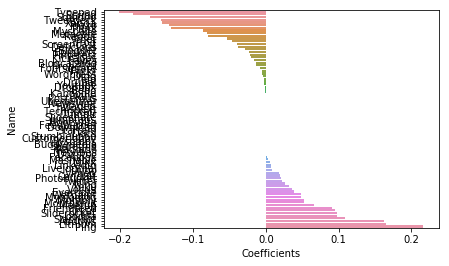

In [42]:
ax = sns.barplot(x="Coefficients", y="Name", data=j)

In [43]:
# Create dataframe for coefficients data 
coefficients = pd.DataFrame({'Name':coef.index, 'Coefficients':coef.values})

In [44]:
#Create merged dataframe of Coefficients and corresponding categories of websites 
df_analysis = pd.merge(coefficients,desc[['Name','Category']],on='Name', how='left')

In [45]:
# Total Number of categories in the x_test
df_analysis.groupby(['Category']).count().sort_values(by=['Coefficients'])

,Name,Coefficients
Category,,
Video Sharing,1,1
Content / CMS,2,2
Documents,2,2
News,2,2
Video Sharing,3,3
Micro-Blogging,4,4
Photo Sharing,4,4
Social Media Measurement,4,4
Other,5,5


In [46]:
# Create two separate dataframes for coefficients >0 anda < 0
click = df_analysis.loc[df_analysis.Coefficients > 0]
noclick = df_analysis.loc[df_analysis.Coefficients < 0]

In [47]:
#Create merged dataframe of Coefficients and corresponding categories of websites 
j = pd.merge(j,desc[['Name','Category']],on='Name', how='left')

In [48]:
# Create two separate dataframes for coefficients >0 anda < 0
click = j.loc[j.Coefficients > 0].nlargest(10, columns=['Coefficients'])
noclick = j.loc[j.Coefficients < 0].nsmallest(10, columns=['Coefficients'])

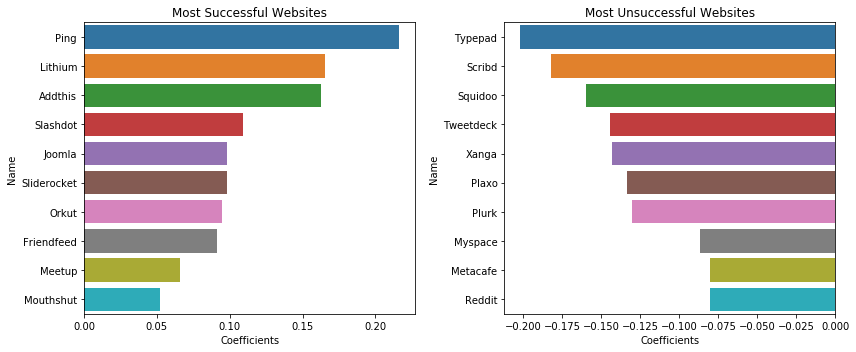

In [49]:
#Distribution of Clicks in Successful Ad Views
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
ax = sns.barplot(x="Coefficients", y="Name", data=click)
ax.set_title('Most Successful Websites')
ax.grid(False)

plt.subplot(1,2,2)
ax = sns.barplot(x="Coefficients", y="Name", data=noclick)
ax.set_title('Most Unsuccessful Websites')
ax.grid(False)

plt.tight_layout()
plt.show()

In [50]:
#List of Top Performing Websites 
noclick.sort_values(by=['Coefficients'], ascending=False)

,Name,folds,Coefficients,Category
9,Reddit,4.5,-0.080231,User-Generated Content Aggregator
8,Metacafe,4.5,-0.080472,Video Sharing
7,Myspace,4.5,-0.086615,Social Networking
6,Plurk,4.5,-0.130668,Micro-Blogging
5,Plaxo,4.5,-0.133519,Social Media Aggregator
4,Xanga,4.5,-0.143198,Blog
3,Tweetdeck,4.5,-0.144472,Social Media Aggregator
2,Squidoo,4.5,-0.159702,News
1,Scribd,4.5,-0.182091,Social Networking
0,Typepad,4.5,-0.202035,Blog


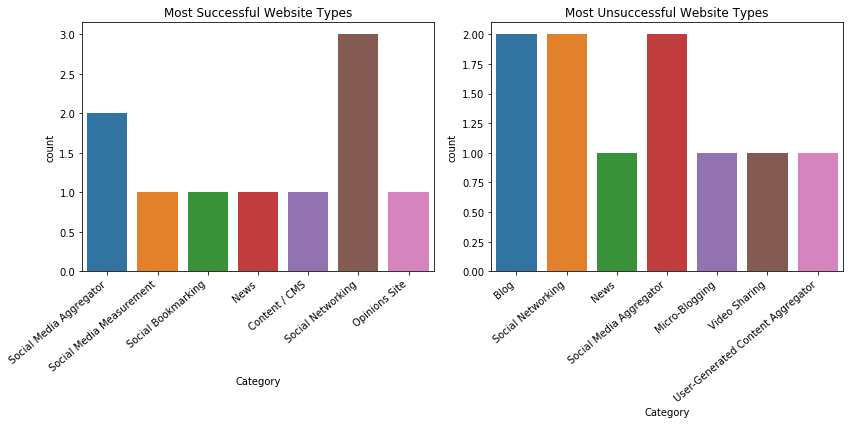

In [51]:
#Distribution of Clicks in Successful Ad Views
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
ax = sns.countplot(click['Category'])
ax.set_title('Most Successful Website Types')
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.subplot(1,2,2)
ax = sns.countplot(noclick['Category'])
ax.set_title('Most Unsuccessful Website Types')
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

In [52]:
#Experiment on Prediction Data - Prepare predictions Data for Model 
x = prep_data(predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [53]:
# Use Model to Make predict class for Predictions DataSet
predictions_final = lr.predict(x)
prediction = pd.DataFrame(data=predictions_final)

In [54]:
predictions['Predictions'] = prediction

In [55]:
predictions.to_csv("final_predictions.csv")